In [187]:
import read_csv, scipy
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants

In [188]:
data = read_csv.read_csv("InGaN_FTIR.csv")
# von cm zu m 
frequenz = scipy.constants.c * np.array(data[0]) * 100
frequenz

array([2.39815071e+14, 2.39800616e+14, 2.39786160e+14, ...,
       1.20124367e+13, 1.19979813e+13, 1.19835259e+13])

In [189]:
wavelength = scipy.constants.c/frequenz
wavelength

array([1.25009849e-06, 1.25017385e-06, 1.25024921e-06, ...,
       2.49568399e-05, 2.49869084e-05, 2.50170494e-05])

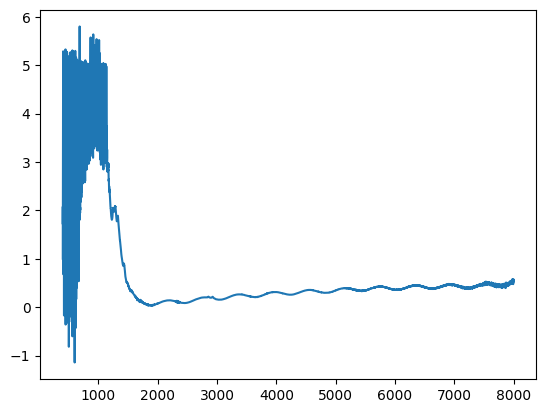

In [197]:
plt.plot(data[0],data[1])

In [190]:
# return index of a sorted list wherelist[index] is a specific value
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [191]:
N = 1200
smooth = np.convolve(data[1], np.ones(N)/N, mode='same')

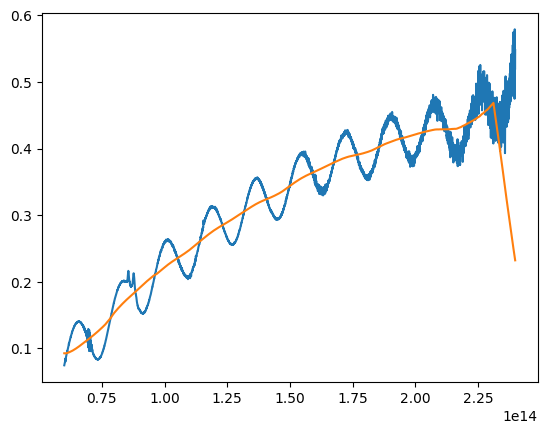

In [192]:
cutoff = find_nearest(frequenz, 0.6e14)
plt.plot(frequenz[:cutoff],data[1][:cutoff])
plt.plot(frequenz[:cutoff],smooth[:cutoff])

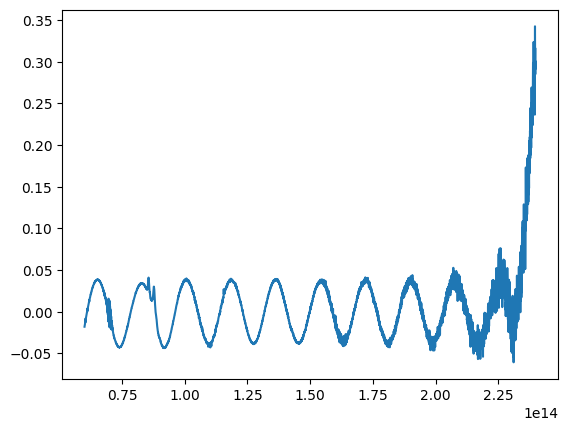

In [193]:
smoothed_out = data[1]-smooth
plt.plot(frequenz[:cutoff],smoothed_out[:cutoff])

In [194]:
minima_index= scipy.signal.argrelmin(smoothed_out[:cutoff],order = 150)
minima_index

(array([  602,  1585,  2823,  4020,  5300,  6524,  7769,  8968, 10229,
        11481], dtype=int64),)

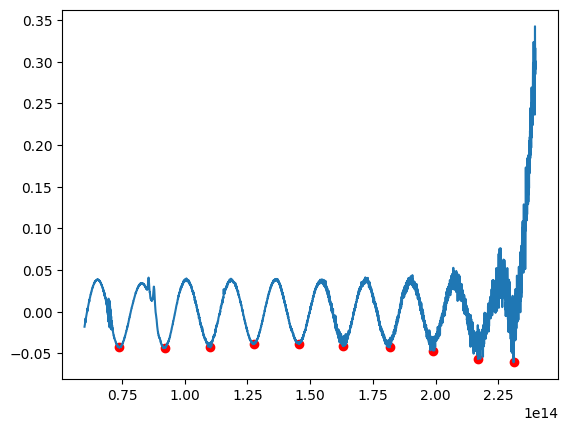

In [195]:
minima_frequenz = []
minima_absorption = []
for minimum in minima_index[0]:
    minima_frequenz.append(frequenz[minimum])
    minima_absorption.append(smoothed_out[minimum])

plt.scatter(minima_frequenz,minima_absorption, color = 'red')
plt.plot(frequenz[:cutoff],smoothed_out[:cutoff])

In [199]:
m_array = []
for i in range(0,len(minima_frequenz)-1):
    m_array.append(minima_frequenz[i+1]/(minima_frequenz[i]-minima_frequenz[i+1]))
m_array

[15.264496456317048,
 11.120355404159199,
 10.50125313054804,
 8.820312507607538,
 8.223856203723898,
 7.0851405631200315,
 6.356964140812775,
 5.044409194276128,
 4.080670930861201]